# 서포트 벡터 머신 SVM

### 데이터 가져오기

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

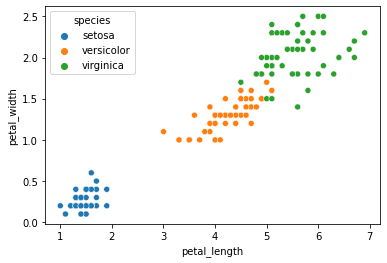

In [32]:
# !pip install seaborn
import seaborn as sns
iris = sns.load_dataset('iris')
sns.scatterplot(x = iris['petal_length'], y = iris['petal_width'], hue = iris['species'])

### 이진 분류를 위한 데이터 처리

In [33]:
import numpy as np
iris['species'] = (iris['species'] == 'setosa').astype(np.float64) # y값 0, 1로 변환
X = iris[['petal_length', 'petal_width']]
y = iris['species']
print(X)
print(y)

     petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
145    0.0
146    0.0
147    0.0
148    0.0
149    0.0
Name: species, Length: 150, dtype: float64


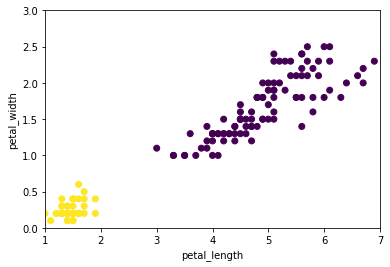

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x=X['petal_length'], y=X['petal_width'], c=y) # c(color)는 y마다 다르게
plt.xlabel('petal_length')
plt.ylabel('petal_width')
# 그래프 범위 설정 
plt.xlim(1, 7)
plt.ylim(0, 3)
plt.show()

### SVM

In [35]:
from sklearn.svm import SVC 
svm = SVC(kernel = 'linear', C=10, random_state=1) # kernel -> 차원을 늘려주는 함수 종류 
svm.fit(X, y)
print(svm.intercept_)
print(svm.coef_)
# a + bx1 + cx2 = 0 -> x2 = px1 + q꼴 만들기
# cx2 = -a -bx1 
# x2 = -a/c -b/cx1 

[3.78823471]
[[-1.29411743 -0.82352928]]


In [36]:
intercept = -( svm.intercept_[0] / svm.coef_[0][1] ) # -a/c
coef = -(svm.coef_[0][0] / svm.coef_[0][1] ) # -b/c

X1_ran = np.linspace( min(X['petal_length']), max(X['petal_length']), 50) # 균등 분할로 data 뽑기
X2_ran = intercept + coef * X1_ran # X1과 식으로부터 도출

print(intercept, coef) # x2 = 4.6 -1.57*x1

4.600000040871756 -1.5714285714285712


### 결정 경계 그래프 그리기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


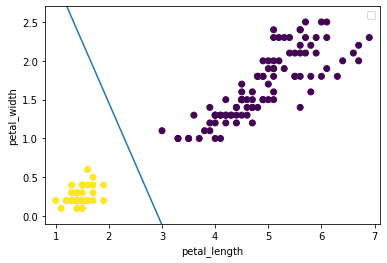

In [37]:
plt.scatter(x = X['petal_length'], y = X['petal_width'], c=y)
plt.plot(X1_ran, X2_ran)

plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.xlim( min(X['petal_length']-0.2), max(X['petal_length']+0.2) )
plt.ylim( min(X['petal_width']-0.2), max(X['petal_width']+0.2) )

plt.legend()
plt.show()

### margin 그리기


/Users/isdiscodead/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


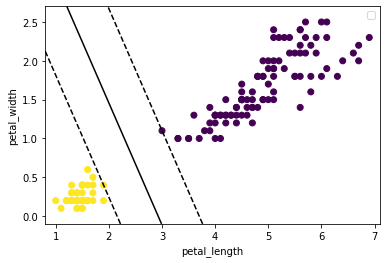

In [38]:
x = np.linspace( min(X['petal_length']-0.2), max(X['petal_length']+0.2), 100 )
yy = np.linspace( min(X['petal_width']-0.2), max(X['petal_width']+0.2), 100 )

X1, Y1 = np.meshgrid(x, yy)
xy = np.vstack([X1.ravel(), Y1.ravel()]).T
Z = svm.decision_function(xy).reshape(X1.shape)

plt.contour(X1, Y1, Z, colors='k', levels=[-1, 0, 1], linestyles=['--','-','--'])

plt.scatter(x = X['petal_length'], y = X['petal_width'], c=y)
plt.xlim( min(X['petal_length']-0.2), max(X['petal_length']+0.2) )
plt.ylim( min(X['petal_width']-0.2), max(X['petal_width']+0.2) )
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

### Epsilon 사용하기

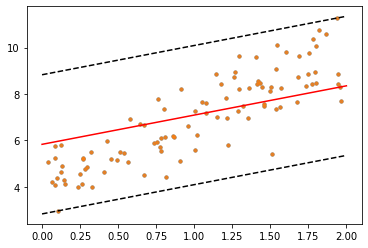

In [42]:
from sklearn.svm import SVR
import pandas as pd

X = 2 * np.random.rand(100, 1) # 랜덤 난수로 데이터 생성
y = 4 + 3*X + np.random.randn(100, 1)
y = y.reshape(100, )

plt.scatter(X, y, s=10, alpha=0.8 )

svm_reg = SVR( kernel='linear', epsilon=3 ) # C 생략됨 
svm_reg.fit(X, y)

intercept = svm_reg.intercept_[0]
coef = svm_reg.coef_[0]

X_new = np.linspace(0, 2, 100)
y_new = intercept + coef[0] * X_new

X_new = X_new.reshape(100, 1)
y_pred = svm_reg.predict(X_new)

plt.scatter(X, y, s=10, alpha=0.8)
plt.plot(X_new, y_new, c='r')
plt.plot(X_new, y_pred+svm_reg.epsilon, 'k--')
plt.plot(X_new, y_pred-svm_reg.epsilon, 'k--')
plt.show()